# **PAKDD Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

pakdd_ds_path = '../../datasets/PAKDD-2010/'
pakdd_prep_ds_path = '../../datasets/preprocessed/pakdd/'

(CVXPY) May 25 09:05:18 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 09:05:18 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(pakdd_prep_ds_path)

In [3]:
data = utilities.read_csv(pakdd_ds_path + 'PAKDD2010_Modeling_Data.txt', sep='\t', header=None, encoding='unicode_escape')
data

/home/rr/DevOps/credit-scoring/src/utilities.py:29: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(dataset_path, dtype=dtype, sep=sep, header=header, encoding=encoding)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50000 non-null  int64  
 1   1       50000 non-null  object 
 2   2       50000 non-null  int64  
 3   3       50000 non-null  object 
 4   4       50000 non-null  int64  
 5   5       50000 non-null  int64  
 6   6       50000 non-null  object 
 7   7       50000 non-null  int64  
 8   8       50000 non-null  int64  
 9   9       50000 non-null  int64  
 10  10      50000 non-null  object 
 11  11      50000 non-null  object 
 12  12      50000 non-null  int64  
 13  13      50000 non-null  object 
 14  14      50000 non-null  object 
 15  15      50000 non-null  object 
 16  16      50000 non-null  object 
 17  17      50000 non-null  object 
 18  18      48651 non-null  float64
 19  19      46223 non-null  float64
 20  20      50000 non-null  object 
 21  21      50000 non-null  int64  
 22

In [5]:
features_descr = utilities.read_excel(pakdd_ds_path + 'PAKDD2010_VariablesList.XLS')
features_descr

,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
5,6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
6,7,SEX,NaN,"M=Male, F=Female"
7,8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
8,9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."
9,10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5"


#### Fix column names.

In [6]:
data.columns = ['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'EDUCATION_LEVEL', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_MOBILE_PHONE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'PRODUCT', 'FLAG_ACSP_RECORD', 'AGE', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3', 'TARGET_LABEL_BAD=1']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

#### Fix columns dtypes.

In [7]:
data['POSTAL_ADDRESS_TYPE'] = data['POSTAL_ADDRESS_TYPE'].astype('category')
data['MARITAL_STATUS'] = data['MARITAL_STATUS'].astype('category')
data['EDUCATION_LEVEL'] = data['EDUCATION_LEVEL'].astype('category')
data['NACIONALITY'] = data['NACIONALITY'].astype('category')
data['RESIDENCE_TYPE'] = data['RESIDENCE_TYPE'].astype('category')
data['FLAG_EMAIL'] = data['FLAG_EMAIL'].astype('category')
data['FLAG_VISA'] = data['FLAG_VISA'].astype('category')
data['FLAG_MASTERCARD'] = data['FLAG_MASTERCARD'].astype('category')
data['FLAG_DINERS'] = data['FLAG_DINERS'].astype('category')
data['FLAG_AMERICAN_EXPRESS'] = data['FLAG_AMERICAN_EXPRESS'].astype('category')
data['FLAG_OTHER_CARDS'] = data['FLAG_OTHER_CARDS'].astype('category')
data['PROFESSION_CODE'] = data['PROFESSION_CODE'].astype('category')
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].astype('category')
data['MATE_PROFESSION_CODE'] = data['MATE_PROFESSION_CODE'].astype('category')
data['MATE_EDUCATION_LEVEL'] = data['MATE_EDUCATION_LEVEL'].astype('category')
data['FLAG_HOME_ADDRESS_DOCUMENT'] = data['FLAG_HOME_ADDRESS_DOCUMENT'].astype('category')
data['FLAG_RG'] = data['FLAG_RG'].astype('category')
data['FLAG_CPF'] = data['FLAG_CPF'].astype('category')
data['FLAG_INCOME_PROOF'] = data['FLAG_INCOME_PROOF'].astype('category')
data = utilities.object_to_category(data)

#### Fix target feature.

In [8]:
data['defaulted'] = data['TARGET_LABEL_BAD=1'] == 1
data.drop(['TARGET_LABEL_BAD=1'], axis=1, inplace=True)

#### Plot features data types.

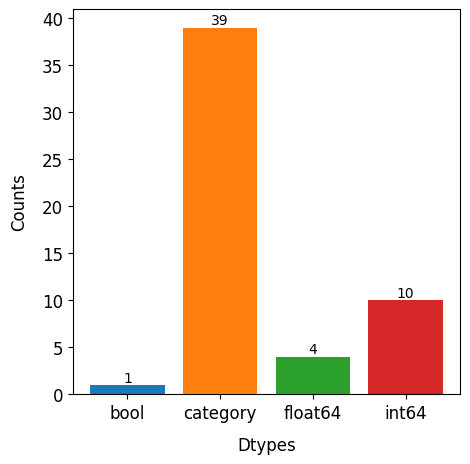

In [9]:
plotting.plot_dtypes_hist(data, save_path=pakdd_prep_ds_path)

#### Data cleaning.

In [10]:
before_data_cleaning_count = len(data)

#### Drop useless and ambiguous features.

In [11]:
data.drop(['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY', 'PRODUCT', 'RESIDENCIAL_PHONE_AREA_CODE', 'PROFESSIONAL_PHONE_AREA_CODE'], axis=1, inplace=True)

#### Plot class distribution.

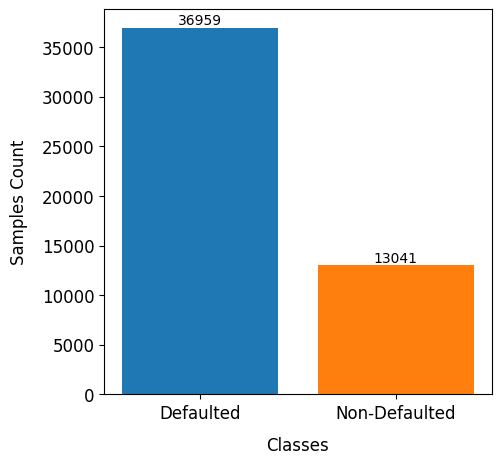

In [12]:
plotting.plot_class_distr_hist(data, save_path=pakdd_prep_ds_path)

#### Plot missing values histogram.

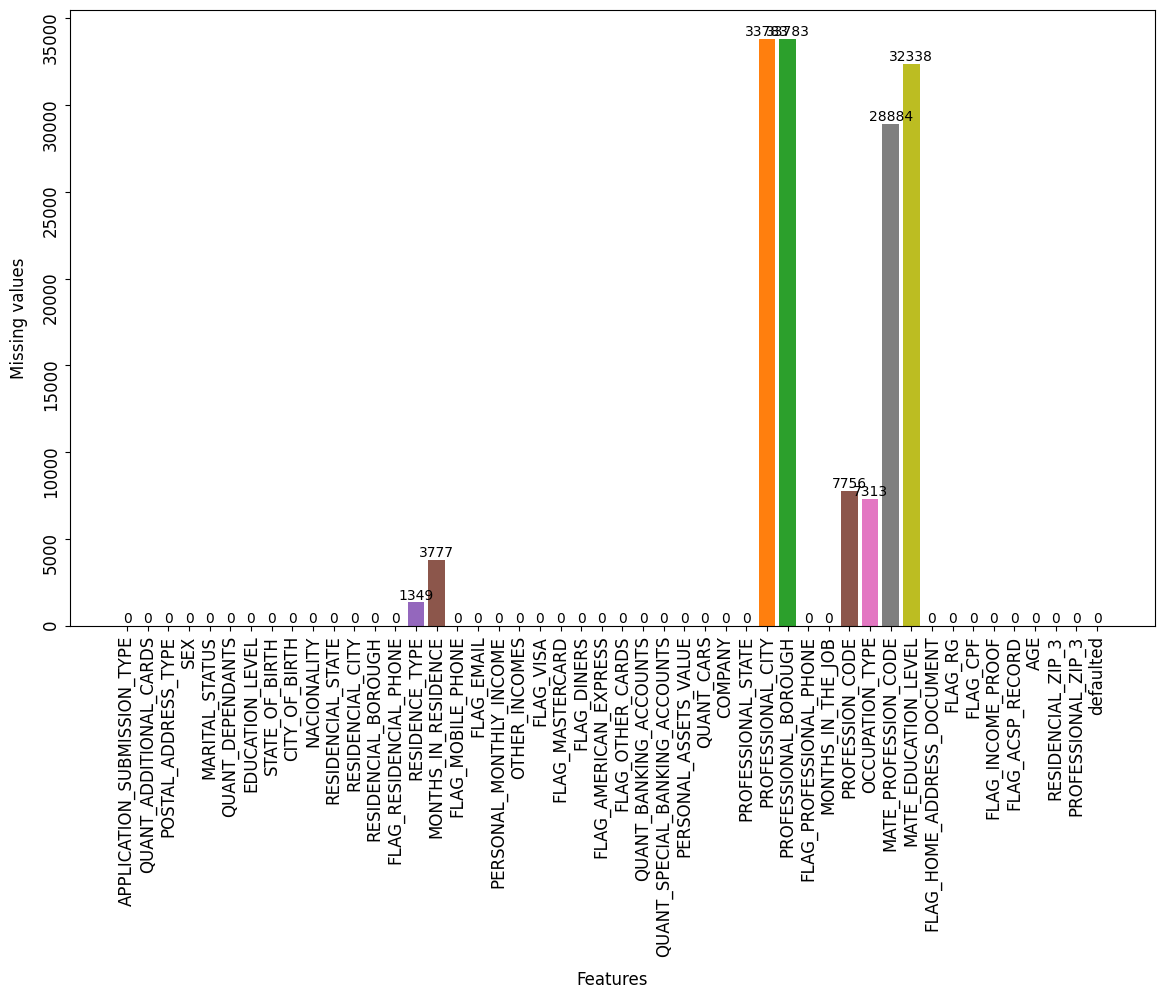

In [13]:
plotting.plot_missing_hist(data, figsize=(14,8), save_path=pakdd_prep_ds_path)

#### Drop features with too many missing values.

In [14]:
data.drop(['PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL'], axis=1, inplace=True)

#### Apply optimal binninf and WoE.

In [15]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=pakdd_prep_ds_path,
                                                     verbose=True)



Processing feature: APPLICATION_SUBMISSION_TYPE.
2023-05-25 09:05:19,561 | INFO : Optimal binning started.
2023-05-25 09:05:19,561 | INFO : Options: check parameters.
2023-05-25 09:05:19,561 | INFO : Pre-processing started.
2023-05-25 09:05:19,561 | INFO : Pre-processing: number of samples: 50000
2023-05-25 09:05:19,566 | INFO : Pre-processing: number of clean samples: 50000
2023-05-25 09:05:19,566 | INFO : Pre-processing: number of missing samples: 0
2023-05-25 09:05:19,567 | INFO : Pre-processing: number of special samples: 0
2023-05-25 09:05:19,567 | INFO : Pre-processing: number of outlier samples: 0
2023-05-25 09:05:19,567 | INFO : Pre-processing: number of others samples: 0
2023-05-25 09:05:19,567 | INFO : Pre-processing: number of categories: 3
2023-05-25 09:05:19,567 | INFO : Pre-processing: number of categories others: 0
2023-05-25 09:05:19,568 | INFO : Pre-processing terminated. Time: 0.0045s
2023-05-25 09:05:19,568 | INFO : Pre-binning started.
2023-05-25 09:05:19,572 | IN

In [16]:
data

,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,defaulted
0,0.027558,0.0,0.0,0.041594,-0.207405,0.033778,0.0,-0.070369,0.283512,0.0,-0.087578,-1.542200,0.067106,0.062170,0.025723,0.044505,0.0,0.00914,-0.048628,0.0,0.035006,0.126240,0.0,0.0,0.0,0.019804,0.019804,-2.220446e-16,0.019057,0.016814,0.039302,0.022072,0.0,-0.014726,-0.143550,0.0,0.0,0.0,0.0,0.0,-0.254081,0.220248,0.220248,True
1,0.027558,0.0,0.0,0.041594,0.095896,-0.004526,0.0,-0.062770,-0.137686,0.0,-0.041610,-0.013668,-0.068655,0.062170,0.025723,-0.055807,0.0,0.00914,-0.025819,0.0,-0.004349,-0.013174,0.0,0.0,0.0,0.019804,0.019804,-2.220446e-16,0.019057,-0.021136,0.039302,0.022072,0.0,0.207989,-0.143550,0.0,0.0,0.0,0.0,0.0,-0.078994,0.111205,0.111205,True
2,0.027558,0.0,0.0,0.041594,0.095896,-0.004526,0.0,-0.070369,-0.012797,0.0,-0.087578,0.521476,1.017659,0.062170,0.025723,0.000000,0.0,0.00914,-0.025819,0.0,-0.004349,-0.013174,0.0,0.0,0.0,0.019804,0.019804,-2.220446e-16,0.019057,0.016814,0.039302,0.022072,0.0,0.207989,0.000000,0.0,0.0,0.0,0.0,0.0,-0.274883,-0.172107,-0.172107,False
3,0.027558,0.0,0.0,0.041594,0.095896,-0.004526,0.0,-0.018579,-0.012797,0.0,-0.076066,-0.013668,-0.226588,-0.292917,0.000000,0.000000,0.0,0.00914,-0.025819,0.0,-0.004349,-0.013174,0.0,0.0,0.0,0.019804,0.019804,-2.220446e-16,0.019057,0.016814,0.039302,0.022072,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.412821,0.048655,0.048655,False
4,0.027558,0.0,0.0,-0.065080,0.095896,-0.004526,0.0,-0.062770,-0.012797,0.0,-0.041610,0.080875,0.168906,0.062170,0.025723,0.044505,0.0,0.00914,-0.048628,0.0,-0.004349,-0.013174,0.0,0.0,0.0,0.019804,0.019804,-2.220446e-16,0.019057,0.016814,0.039302,0.022072,0.0,-0.014726,-0.056802,0.0,0.0,0.0,0.0,0.0,0.143333,-0.561609,-0.561609,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.042529,0.0,0.0,0.041594,-0.207405,-0.015265,0.0,-0.070369,-0.245294,0.0,-0.087578,-0.147447,-0.226588,0.062170,0.025723,0.044505,0.0,0.00914,-0.048628,0.0,-0.004349,-0.013174,0.0,0.0,0.0,-0.035119,-0.035119,-2.220446e-16,-0.037137,0.016814,0.039302,0.022072,0.0,-0.014726,-0.143550,0.0,0.0,0.0,0.0,0.0,-0.061354,-0.172107,-0.172107,True
49996,-0.042529,0.0,0.0,0.041594,-0.207405,-0.004526,0.0,-0.062770,0.074063,0.0,-0.002841,-0.294349,0.440390,0.062170,0.025723,0.044505,0.0,0.00914,-0.025819,0.0,-0.004349,-0.013174,0.0,0.0,0.0,0.019804,0.019804,-2.220446e-16,0.019057,0.016814,0.039302,0.022072,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.502365,-0.172107,-0.172107,False
49997,0.027558,0.0,0.0,-0.065080,0.095896,-0.015265,0.0,0.159359,-1.829697,0.0,-0.002841,-0.294349,6.572601,0.062170,-0.178177,-0.055807,0.0,0.00914,-0.048628,0.0,-0.004349,-0.013174,0.0,0.0,0.0,0.019804,0.019804,-2.220446e-16,0.019057,-0.021136,-0.073234,-0.058604,0.0,-0.014726,-0.056802,0.0,0.0,0.0,0.0,0.0,-0.061354,-0.100859,-0.100859,False
49998,0.027558,0.0,0.0,0.041594,-0.207405,0.033778,0.0,-0.062770,-0.137686,0.0,0.028852,-0.013668,-6.283789,0.062170,0.025723,0.000000,0.0,0.00914,-0.048628,0.0,-0.004349,-0.013174,0.0,0.0,0.0,0.019804,0.019804,-2.220446e-16,0.019057,-0.021136,-0.095674,-0.058604,0.0,-0.014726,-0.056802,0.0,0.0,0.0,0.0,0.0,-0.254081,0.111205,0.111205,True


#### All missing values handled.

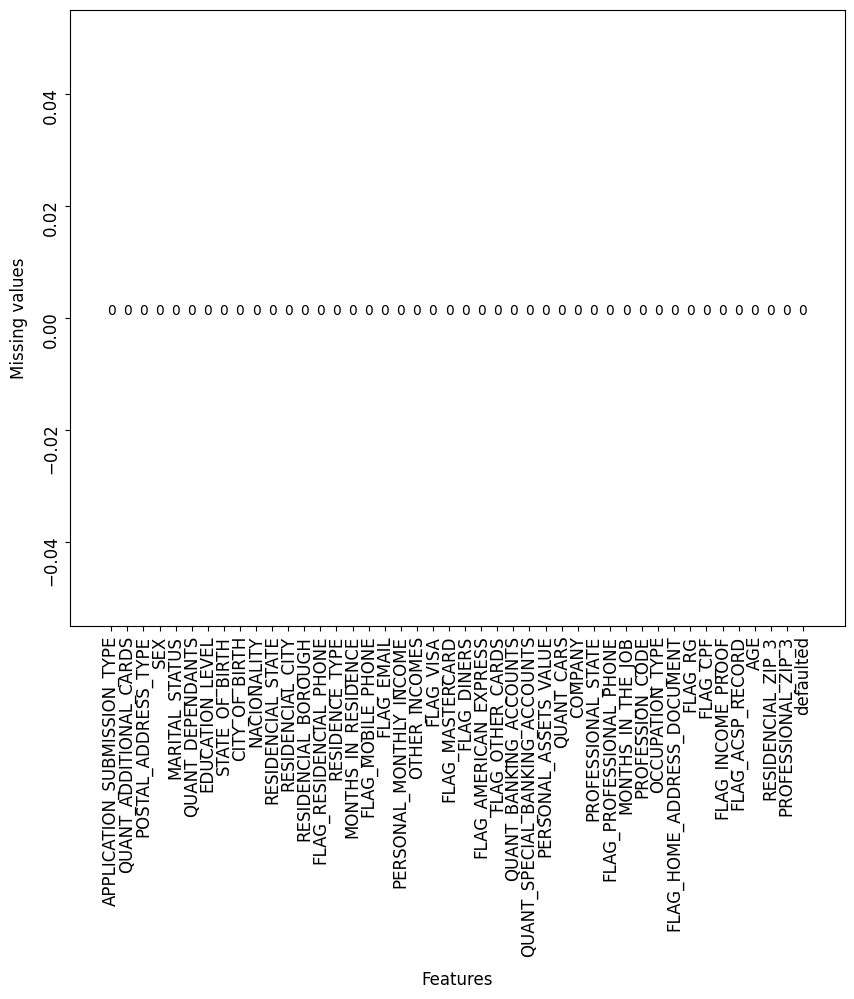

In [17]:
plotting.plot_missing_hist(data, figsize=(10,8), save_path=pakdd_prep_ds_path)

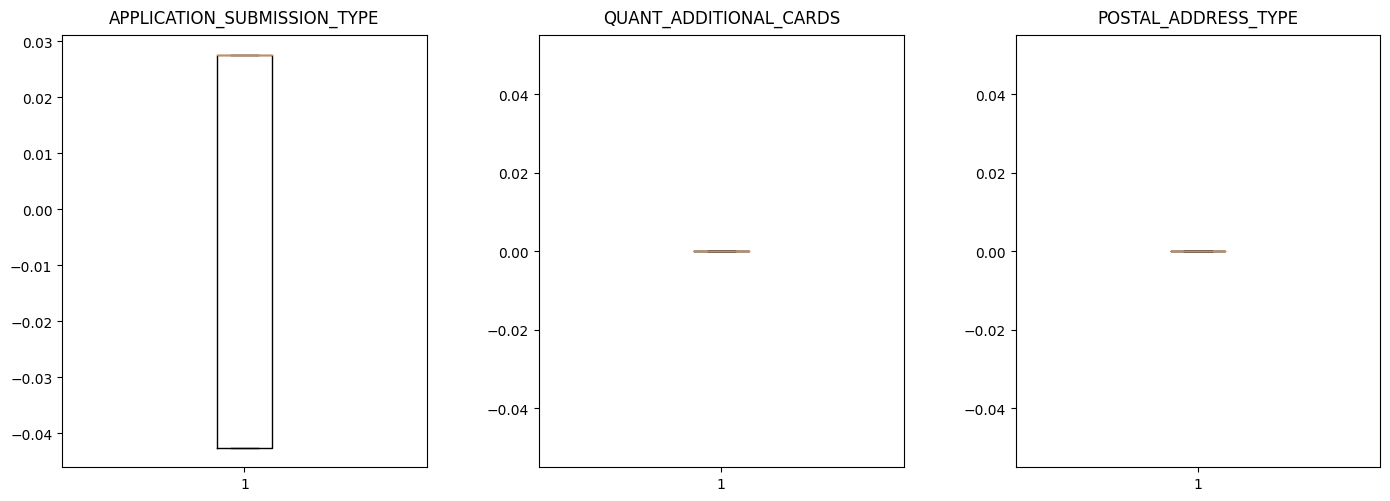

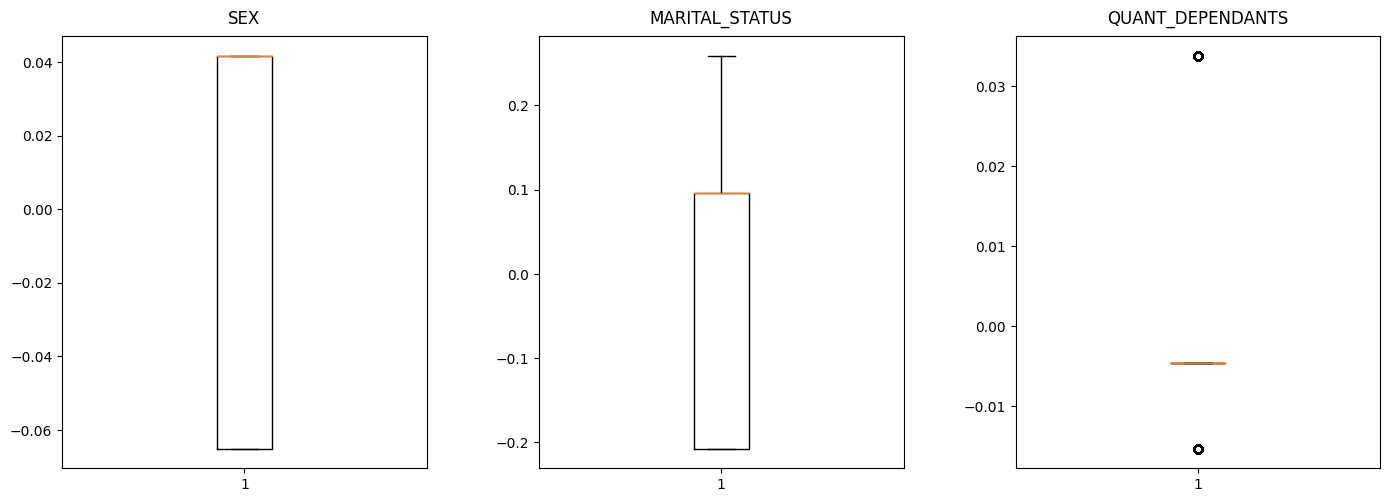

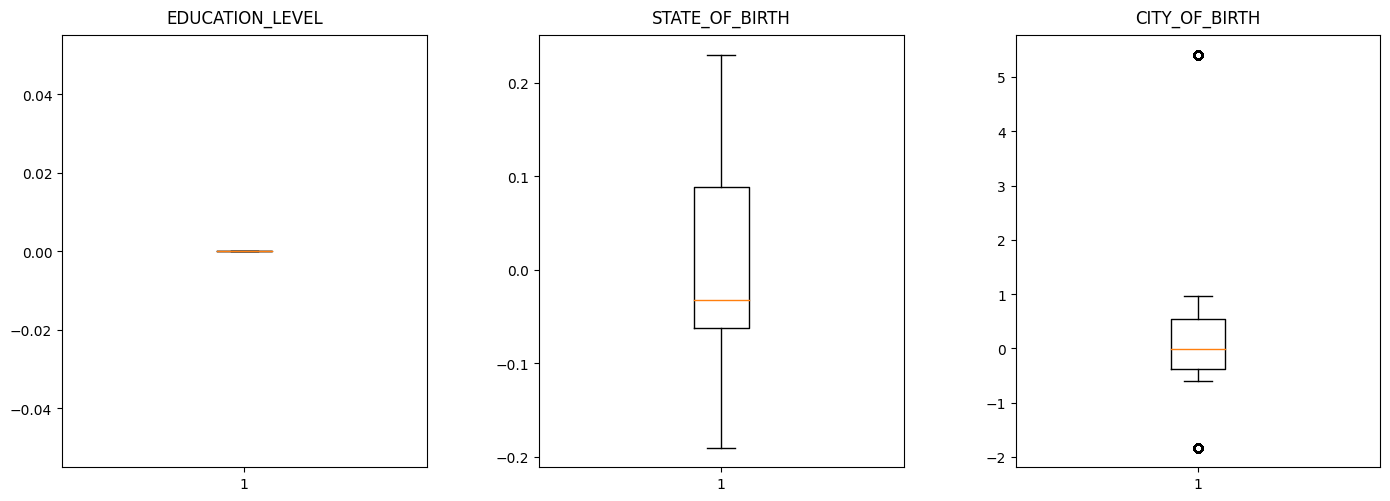

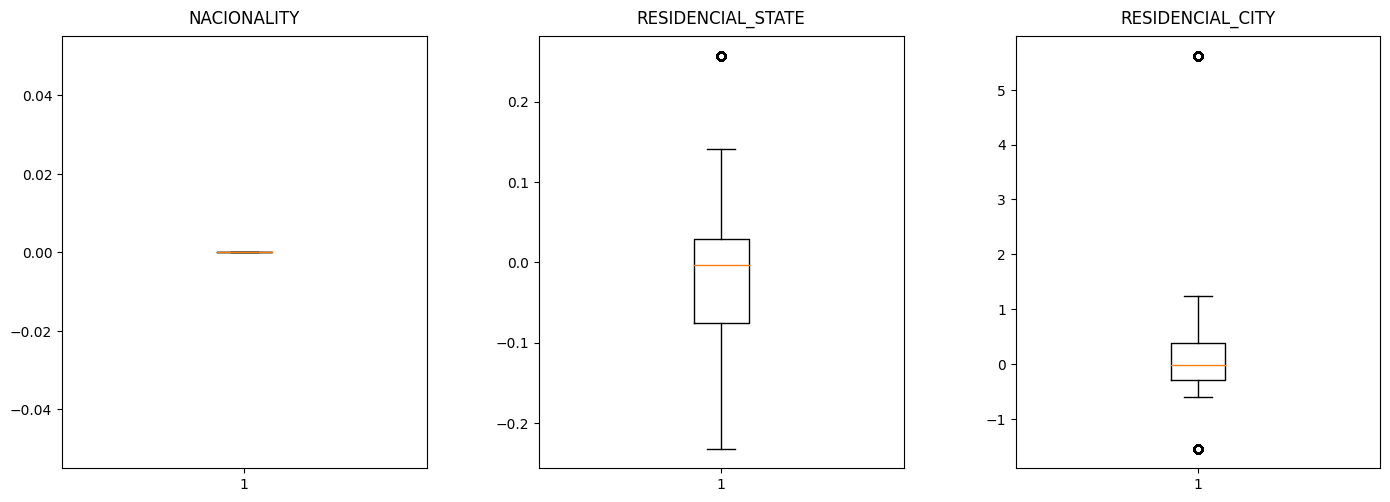

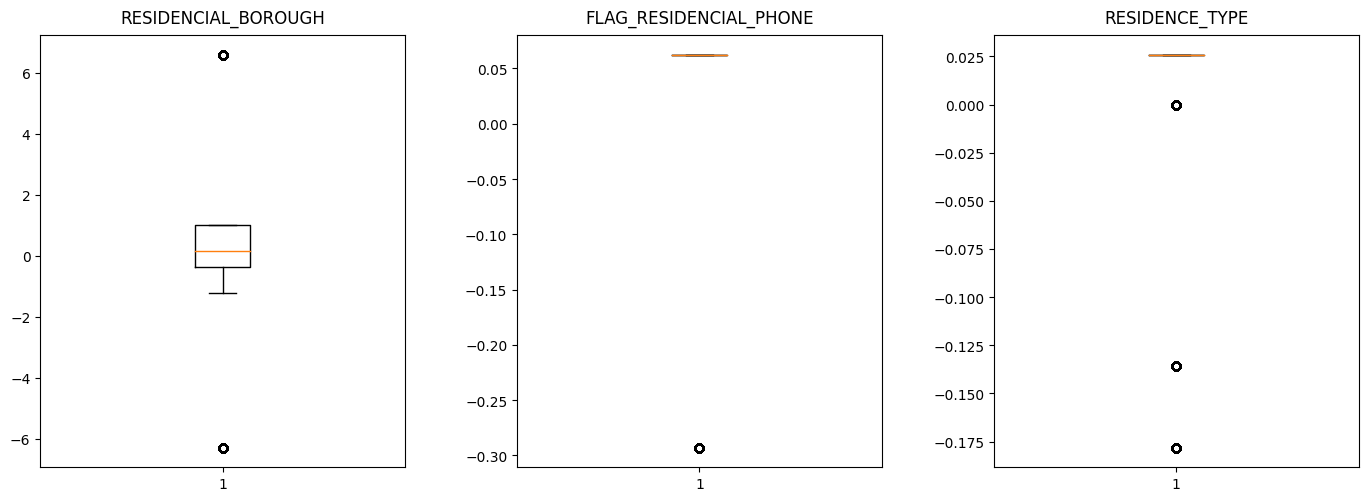

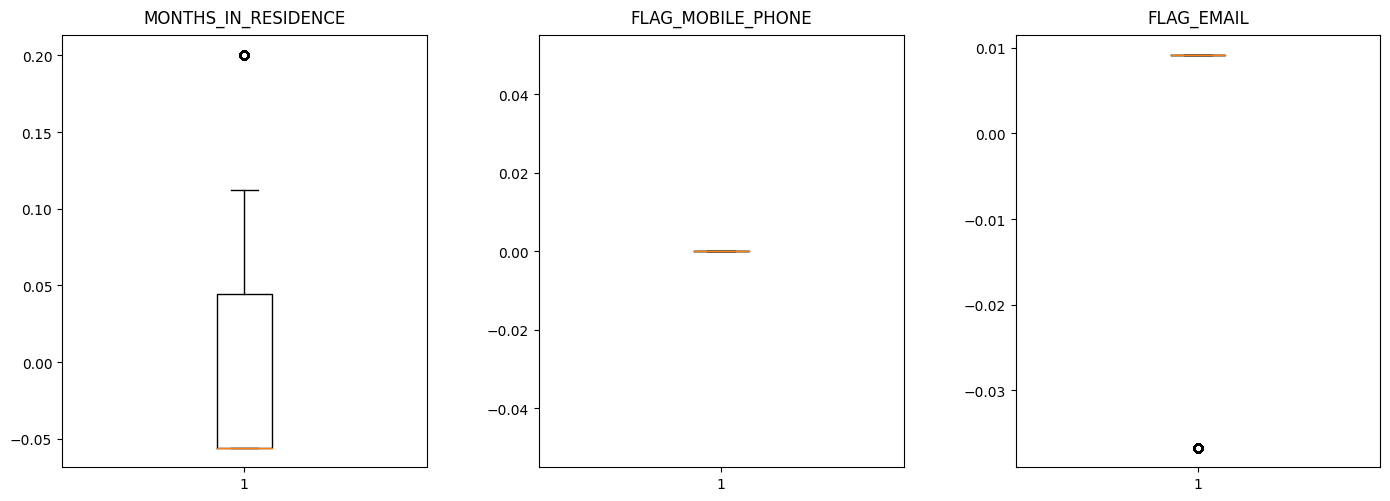

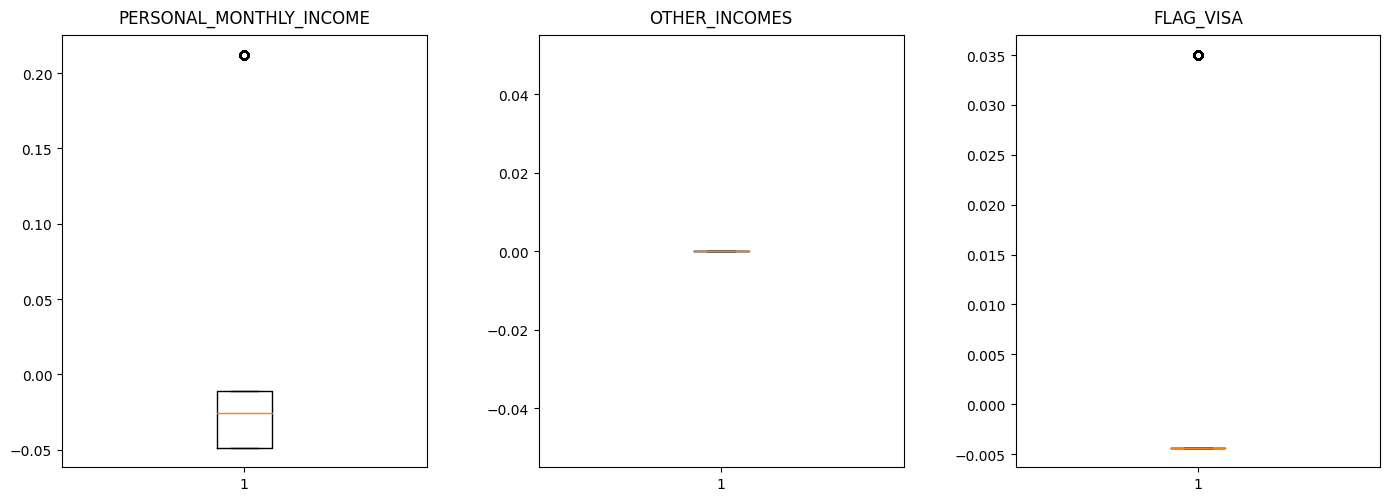

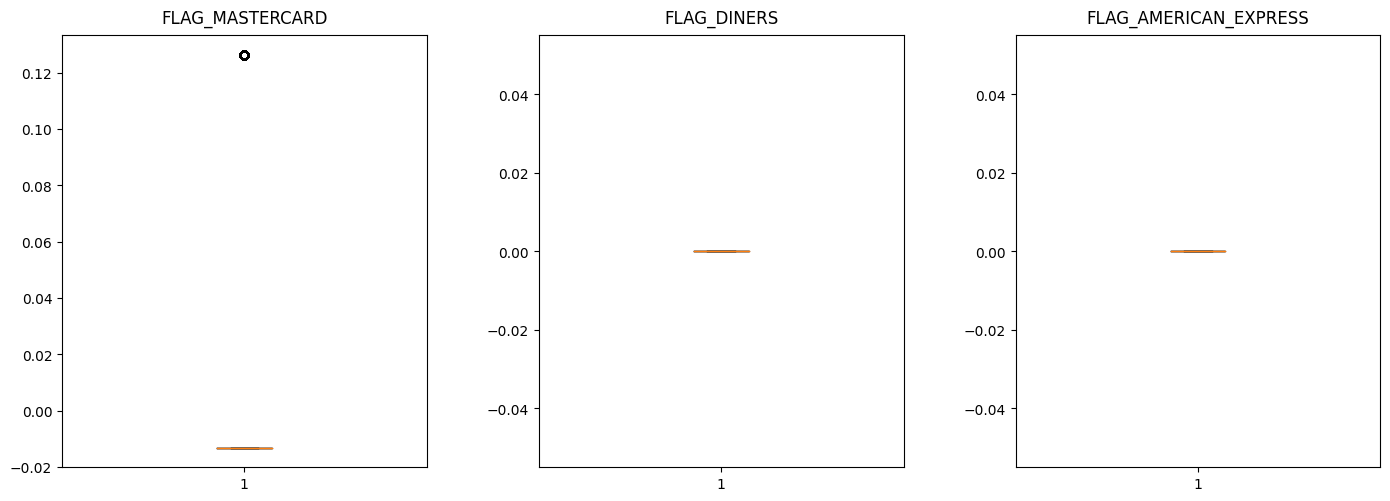

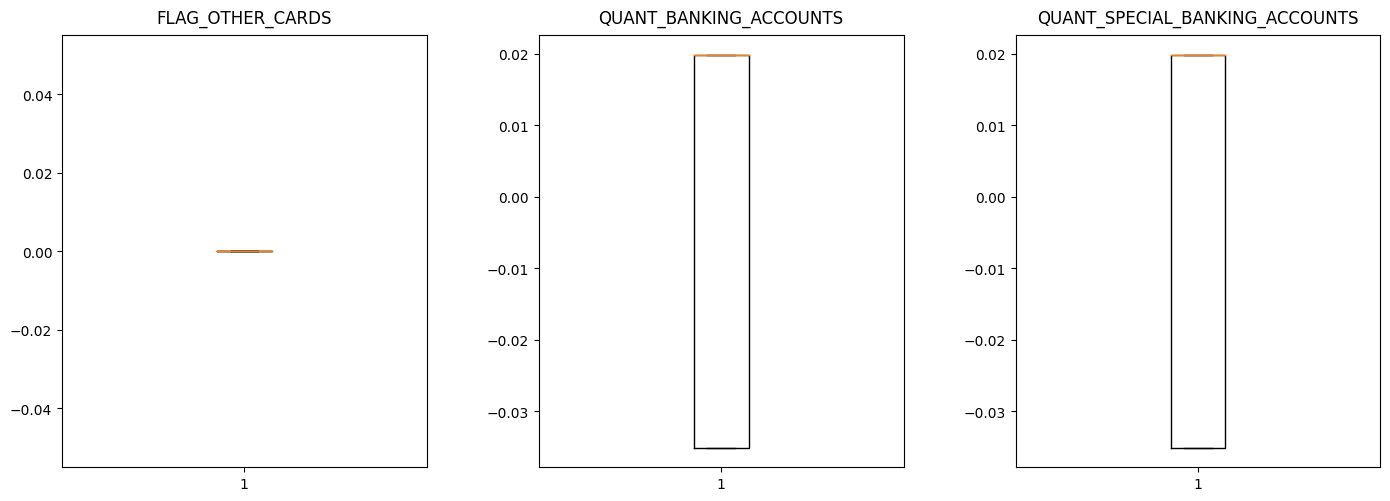

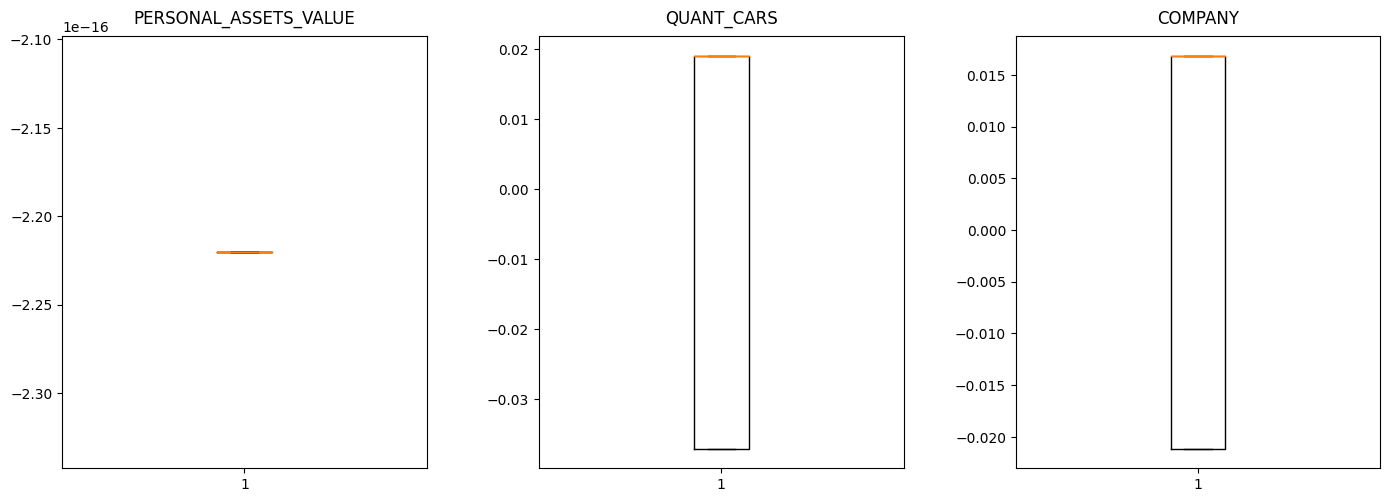

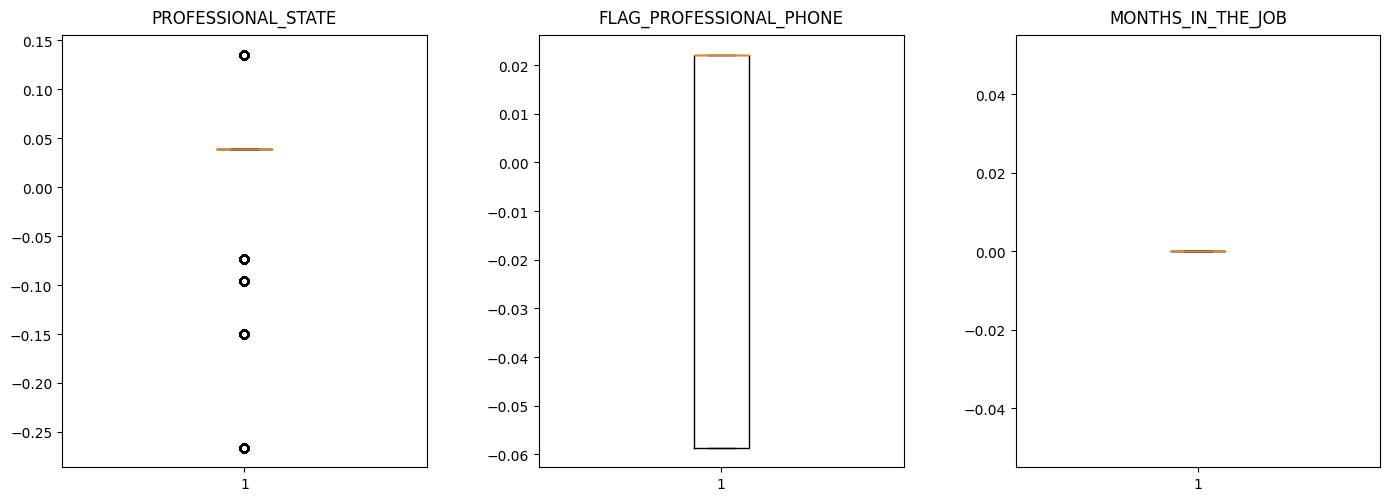

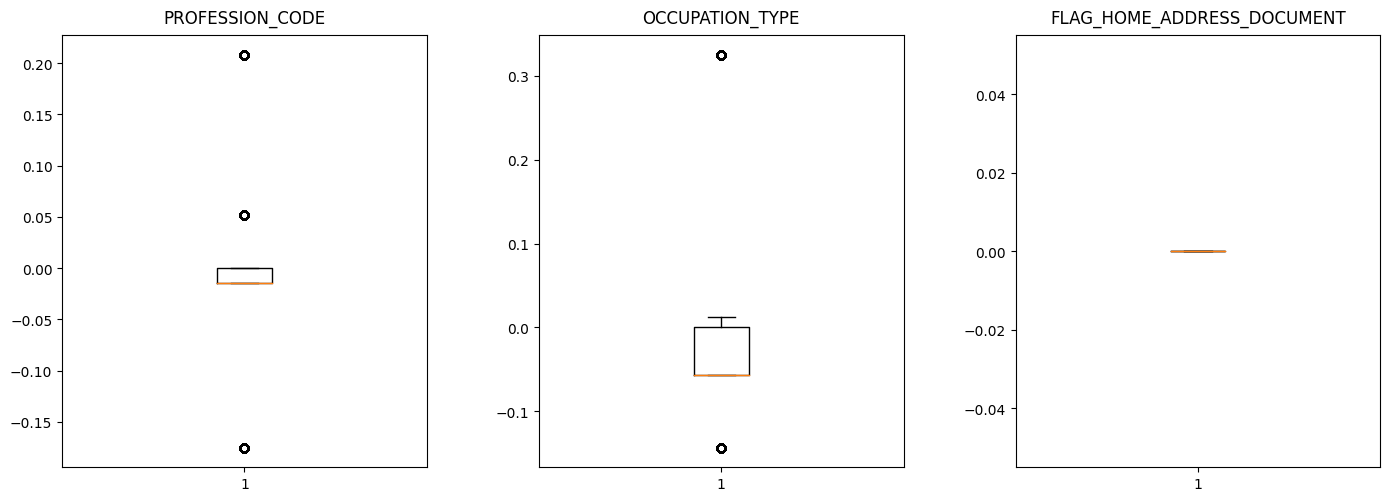

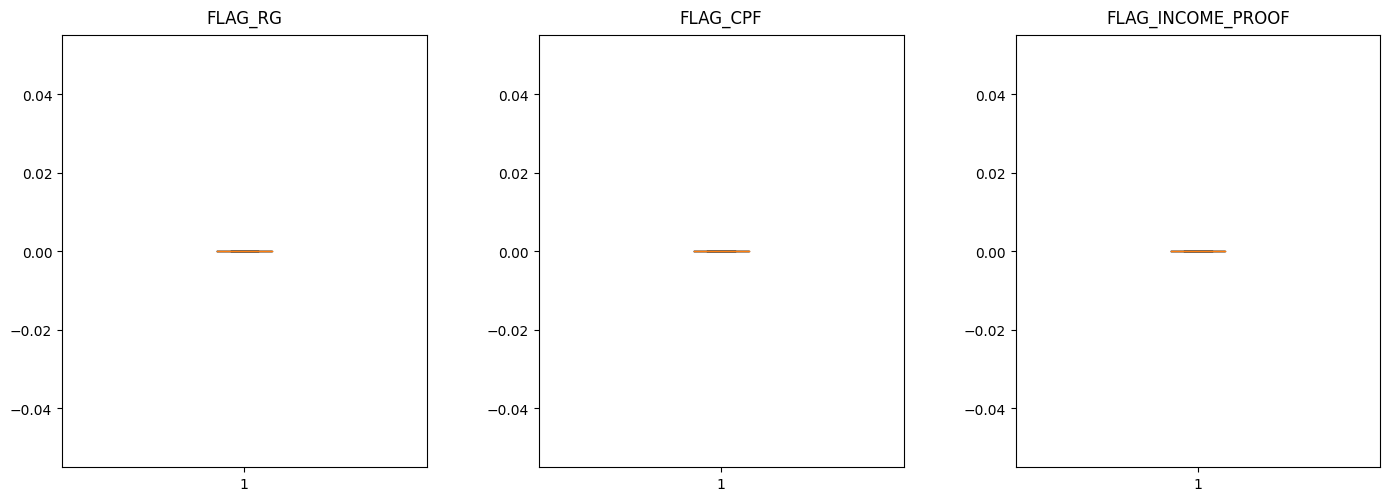

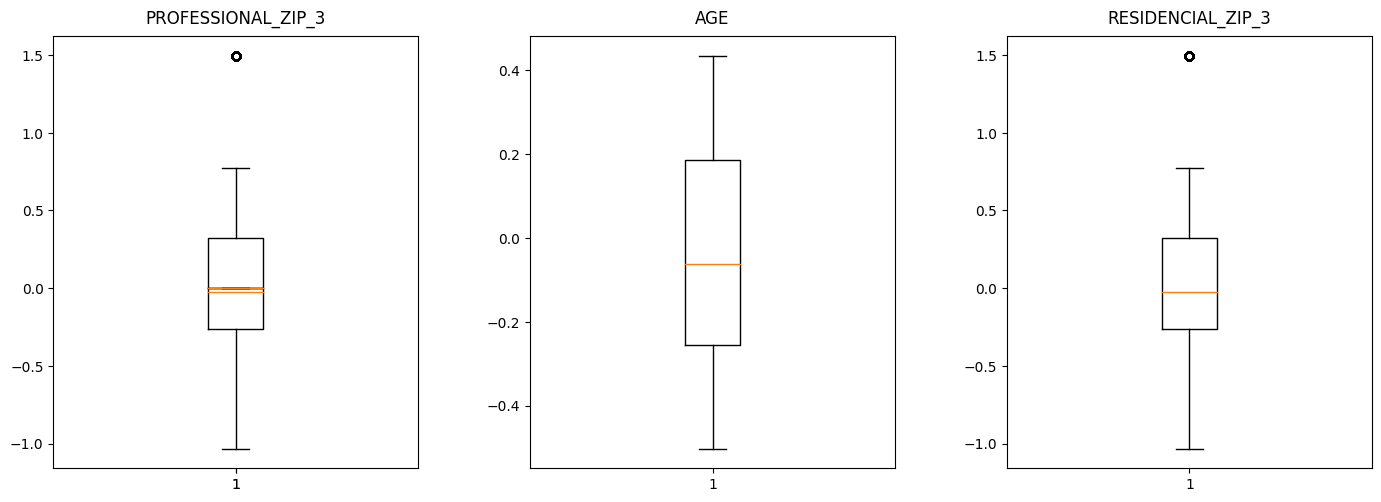

In [18]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=pakdd_prep_ds_path)

In [19]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=pakdd_prep_ds_path)

#### Plot samples count before and after Data cleaning.

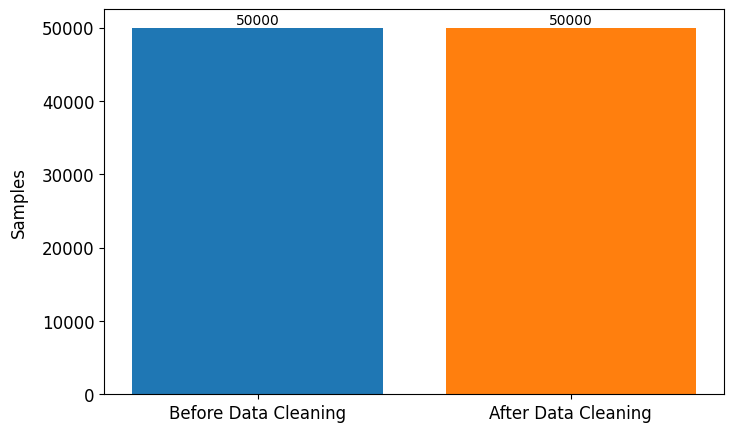

In [20]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=pakdd_prep_ds_path + 'before_after.pdf')

#### Features IV scores

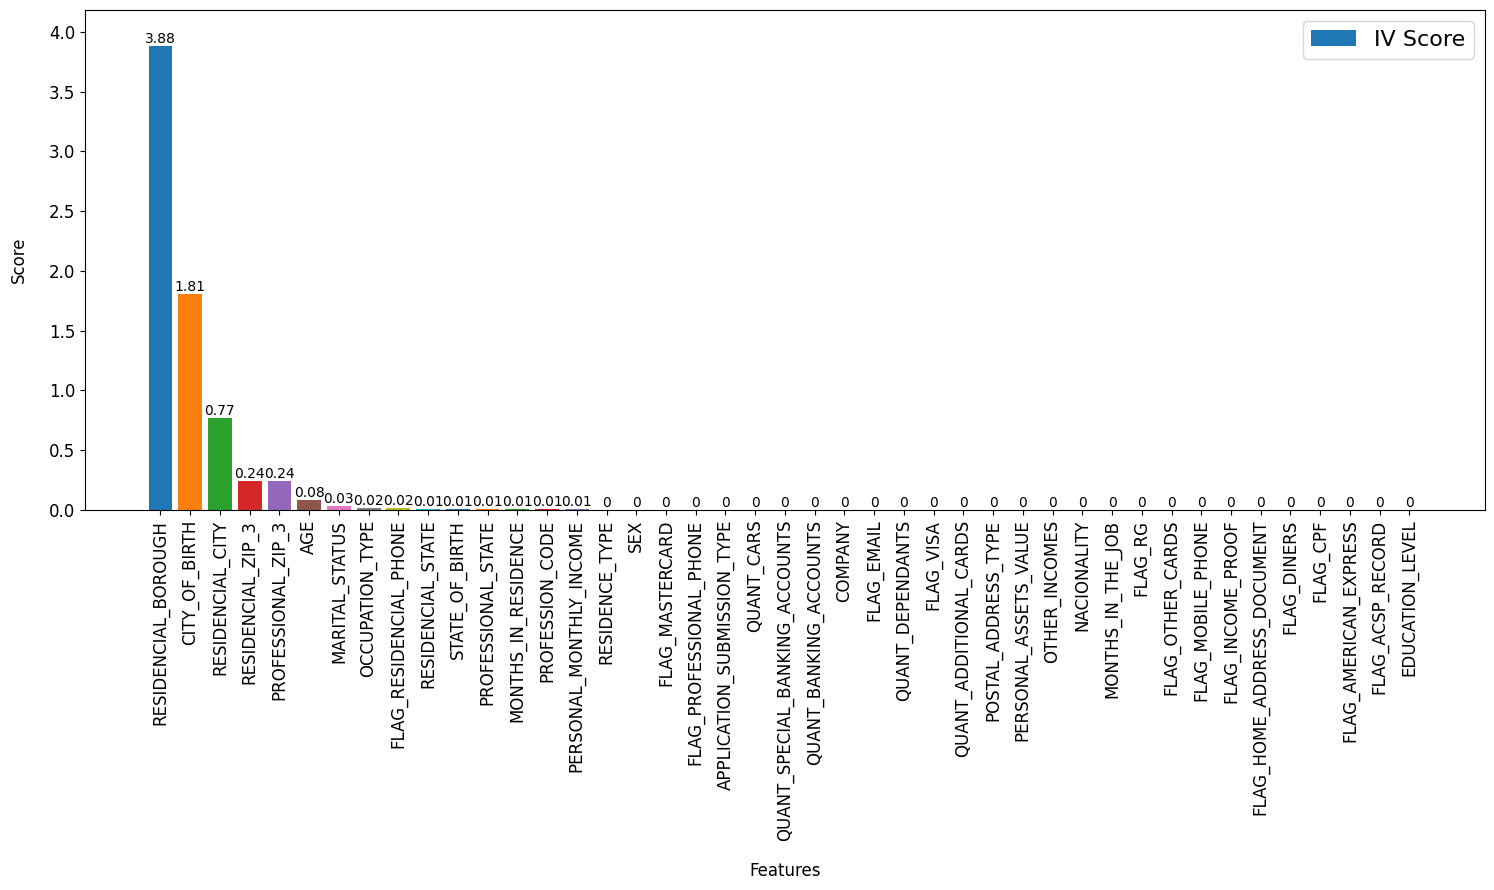

In [21]:
plotting.plot_features_scores(features_scores, '', figsize=(14, 5))

#### Drop features with lowest IV scores.

In [22]:
to_be_dropped = ['QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'NACIONALITY', 'FLAG_MOBILE_PHONE', 'OTHER_INCOMES', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD', 'EDUCATION_LEVEL', 'PERSONAL_ASSETS_VALUE', 'MONTHS_IN_THE_JOB']
data.drop(to_be_dropped, axis=1, inplace=True)
for key in to_be_dropped:
    del features_scores[key]

#### Features correlation

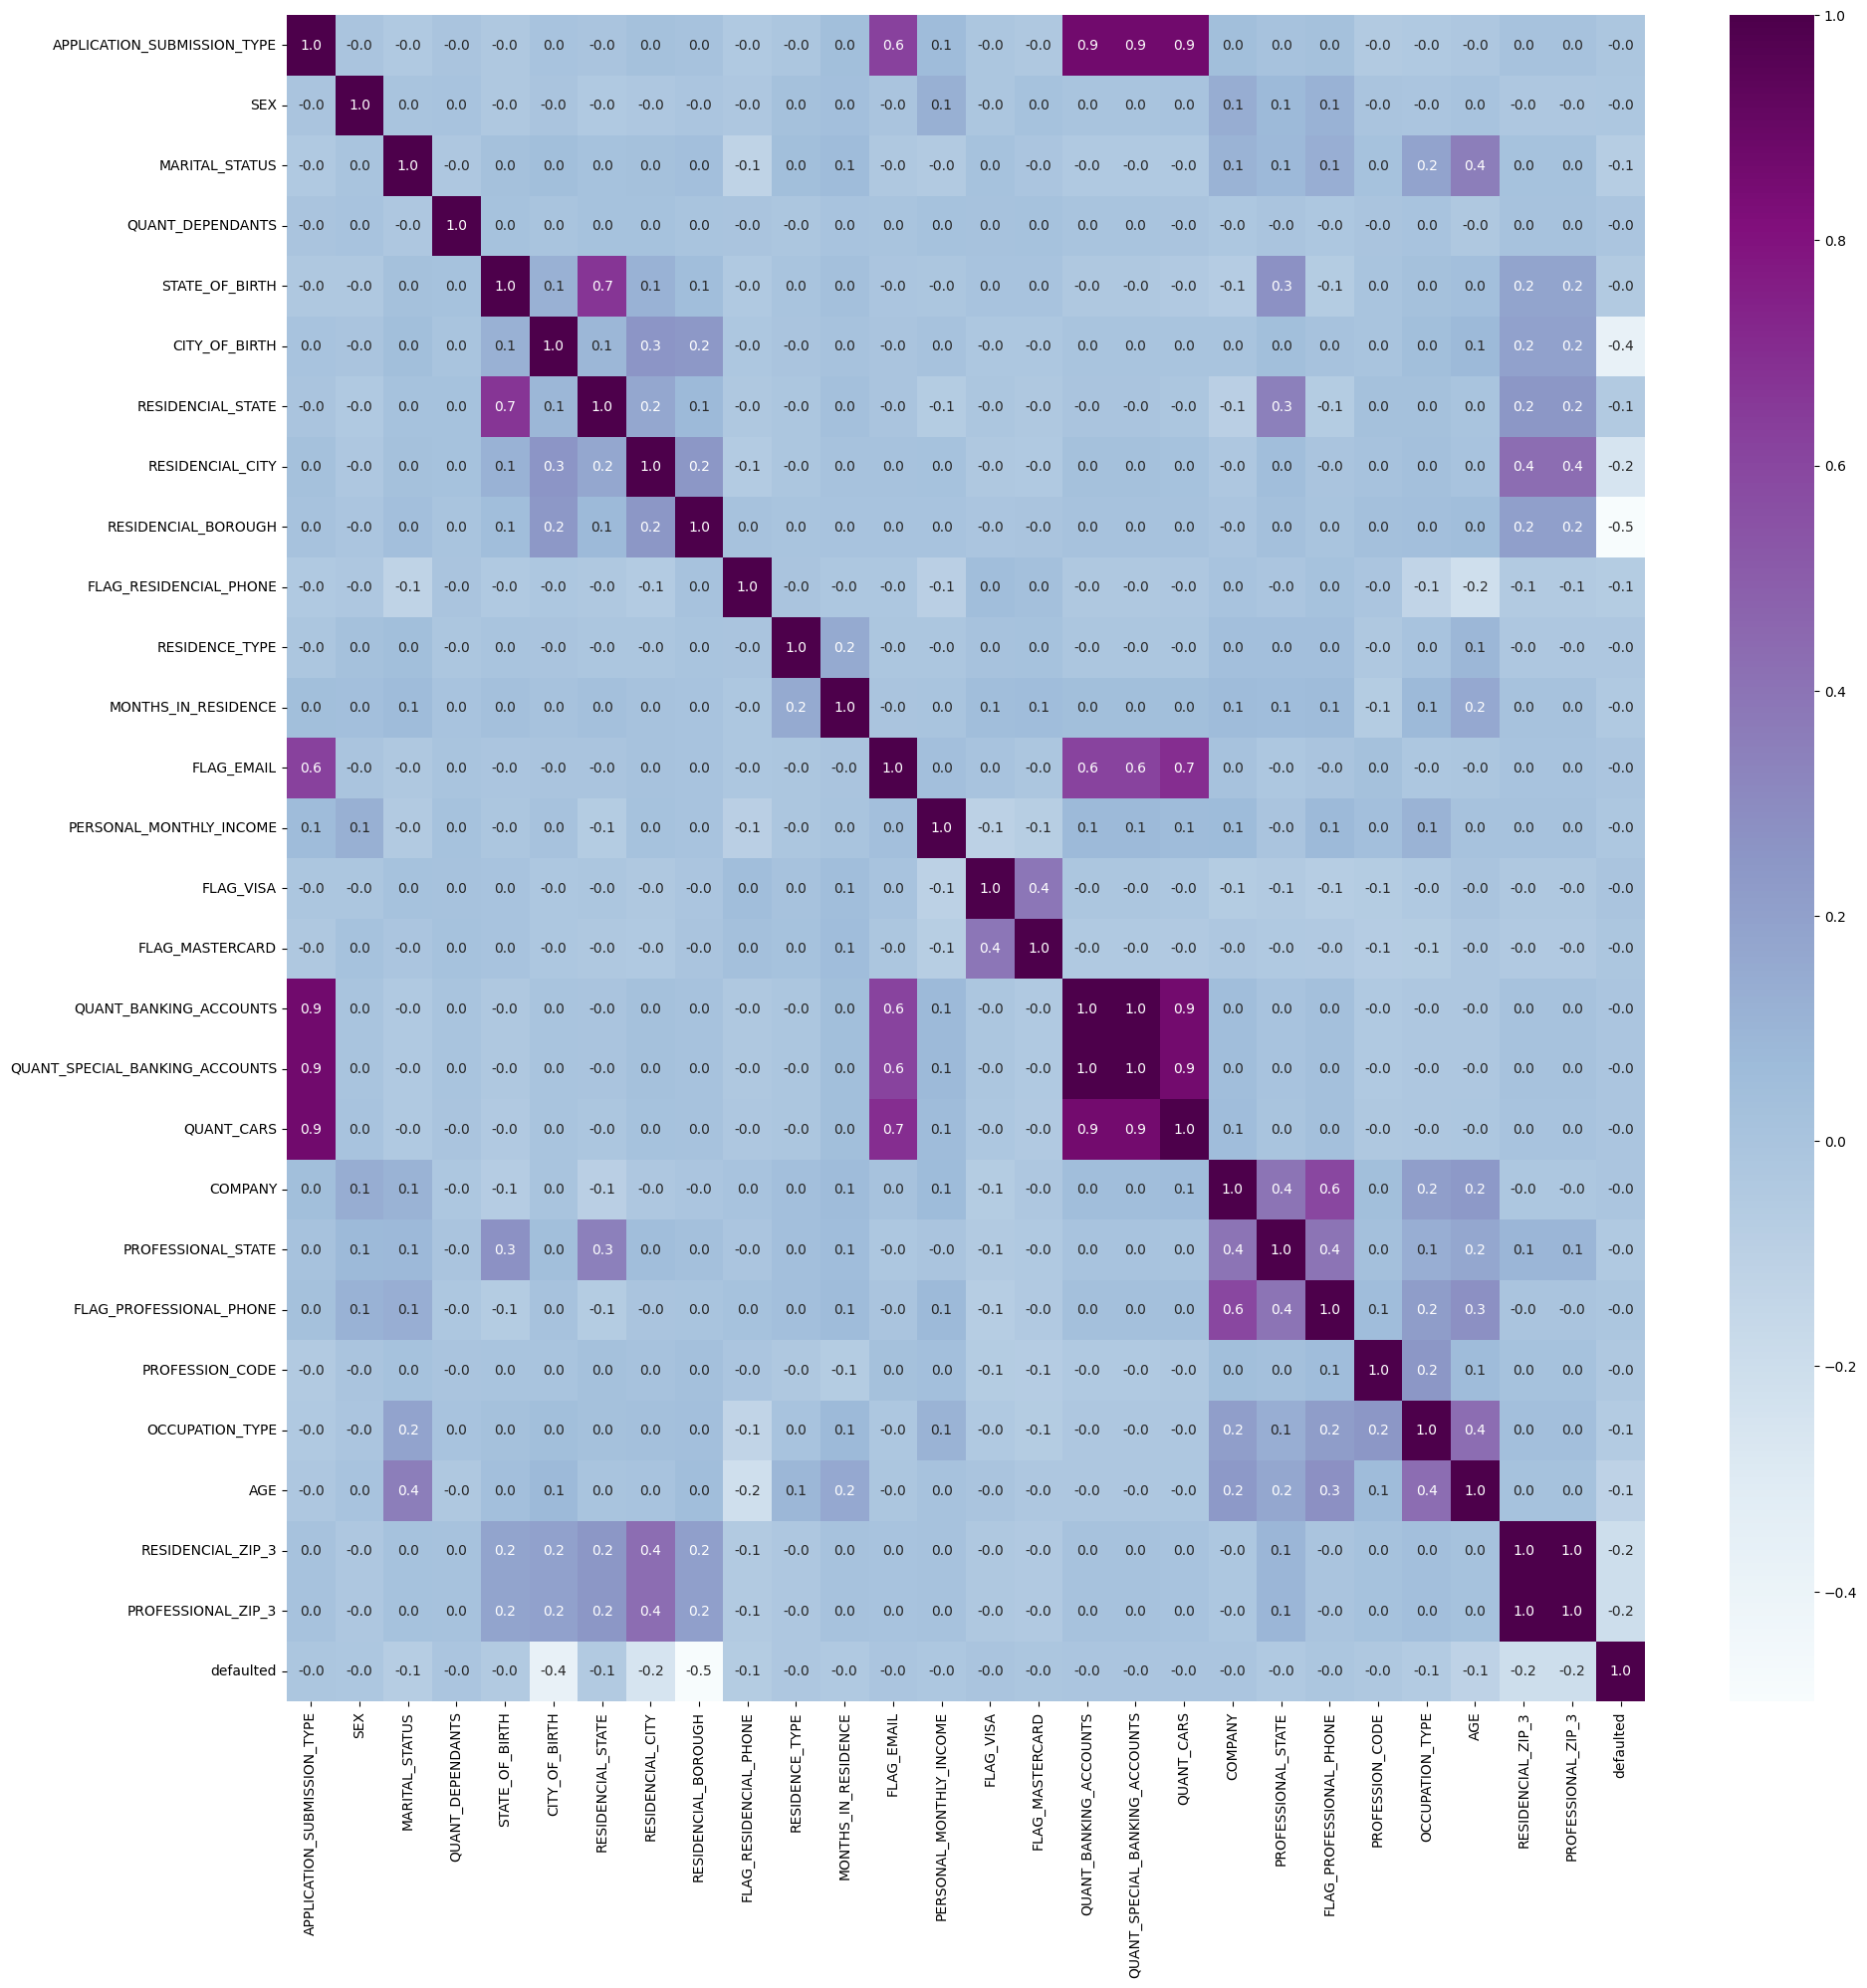

In [23]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(22, 22), save_path=pakdd_prep_ds_path, dpi=100)

#### Drop redundant features using IV score.

In [24]:
to_be_dropped = ['QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'PROFESSIONAL_ZIP_3']
data.drop(to_be_dropped, axis=1, inplace=True)
for key in to_be_dropped:
    del features_scores[key]

#### Save preprocessed dataset.

In [25]:
data

,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,FLAG_VISA,FLAG_MASTERCARD,COMPANY,PROFESSIONAL_STATE,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,AGE,RESIDENCIAL_ZIP_3,defaulted
0,0.027558,0.041594,-0.207405,0.033778,-0.070369,0.283512,-0.087578,-1.542200,0.067106,0.062170,0.025723,0.044505,0.00914,-0.048628,0.035006,0.126240,0.016814,0.039302,0.022072,-0.014726,-0.143550,-0.254081,0.220248,True
1,0.027558,0.041594,0.095896,-0.004526,-0.062770,-0.137686,-0.041610,-0.013668,-0.068655,0.062170,0.025723,-0.055807,0.00914,-0.025819,-0.004349,-0.013174,-0.021136,0.039302,0.022072,0.207989,-0.143550,-0.078994,0.111205,True
2,0.027558,0.041594,0.095896,-0.004526,-0.070369,-0.012797,-0.087578,0.521476,1.017659,0.062170,0.025723,0.000000,0.00914,-0.025819,-0.004349,-0.013174,0.016814,0.039302,0.022072,0.207989,0.000000,-0.274883,-0.172107,False
3,0.027558,0.041594,0.095896,-0.004526,-0.018579,-0.012797,-0.076066,-0.013668,-0.226588,-0.292917,0.000000,0.000000,0.00914,-0.025819,-0.004349,-0.013174,0.016814,0.039302,0.022072,0.000000,0.000000,0.412821,0.048655,False
4,0.027558,-0.065080,0.095896,-0.004526,-0.062770,-0.012797,-0.041610,0.080875,0.168906,0.062170,0.025723,0.044505,0.00914,-0.048628,-0.004349,-0.013174,0.016814,0.039302,0.022072,-0.014726,-0.056802,0.143333,-0.561609,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.042529,0.041594,-0.207405,-0.015265,-0.070369,-0.245294,-0.087578,-0.147447,-0.226588,0.062170,0.025723,0.044505,0.00914,-0.048628,-0.004349,-0.013174,0.016814,0.039302,0.022072,-0.014726,-0.143550,-0.061354,-0.172107,True
49996,-0.042529,0.041594,-0.207405,-0.004526,-0.062770,0.074063,-0.002841,-0.294349,0.440390,0.062170,0.025723,0.044505,0.00914,-0.025819,-0.004349,-0.013174,0.016814,0.039302,0.022072,0.000000,0.000000,-0.502365,-0.172107,False
49997,0.027558,-0.065080,0.095896,-0.015265,0.159359,-1.829697,-0.002841,-0.294349,6.572601,0.062170,-0.178177,-0.055807,0.00914,-0.048628,-0.004349,-0.013174,-0.021136,-0.073234,-0.058604,-0.014726,-0.056802,-0.061354,-0.100859,False
49998,0.027558,0.041594,-0.207405,0.033778,-0.062770,-0.137686,0.028852,-0.013668,-6.283789,0.062170,0.025723,0.000000,0.00914,-0.048628,-0.004349,-0.013174,-0.021136,-0.095674,-0.058604,-0.014726,-0.056802,-0.254081,0.111205,True


In [26]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   APPLICATION_SUBMISSION_TYPE  50000 non-null  float64
 1   SEX                          50000 non-null  float64
 2   MARITAL_STATUS               50000 non-null  float64
 3   QUANT_DEPENDANTS             50000 non-null  float64
 4   STATE_OF_BIRTH               50000 non-null  float64
 5   CITY_OF_BIRTH                50000 non-null  float64
 6   RESIDENCIAL_STATE            50000 non-null  float64
 7   RESIDENCIAL_CITY             50000 non-null  float64
 8   RESIDENCIAL_BOROUGH          50000 non-null  float64
 9   FLAG_RESIDENCIAL_PHONE       50000 non-null  float64
 10  RESIDENCE_TYPE               50000 non-null  float64
 11  MONTHS_IN_RESIDENCE          50000 non-null  float64
 12  FLAG_EMAIL                   50000 non-null  float64
 13  PERSONAL_MONTHLY

**EMP-$p_1$:**

In [27]:
preprocessing.compute_p1(data)

0.26082

**EMP-$p_0$:**

In [28]:
preprocessing.compute_p0(data)

0.73918

In [29]:
preprocessing.save_dataset(data=data,
                           features_scores=features_scores,
                           test_size=0.2,
                           save_path=pakdd_prep_ds_path)

Train split size: 40000
Train split p1: 0.260825
Train split p0: 0.739175

Test split size: 10000
Test split p1: 0.2608
Test split p0: 0.7392
